Columns in dataset: Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              3

C:\Users\jrahu\AppData\Local\Temp\ipykernel_9348\1063714268.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
C:\Users\jrahu\AppData\Local\Temp\ipykernel_9348\1063714268.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Period', data=data, palette='Set2')


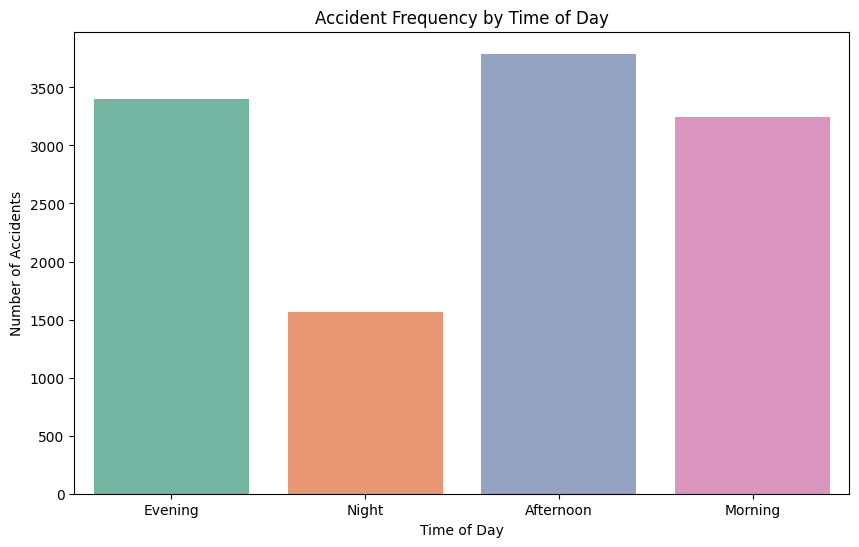

C:\Users\jrahu\AppData\Local\Temp\ipykernel_9348\1063714268.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_allignment', data=data, palette='Set1')


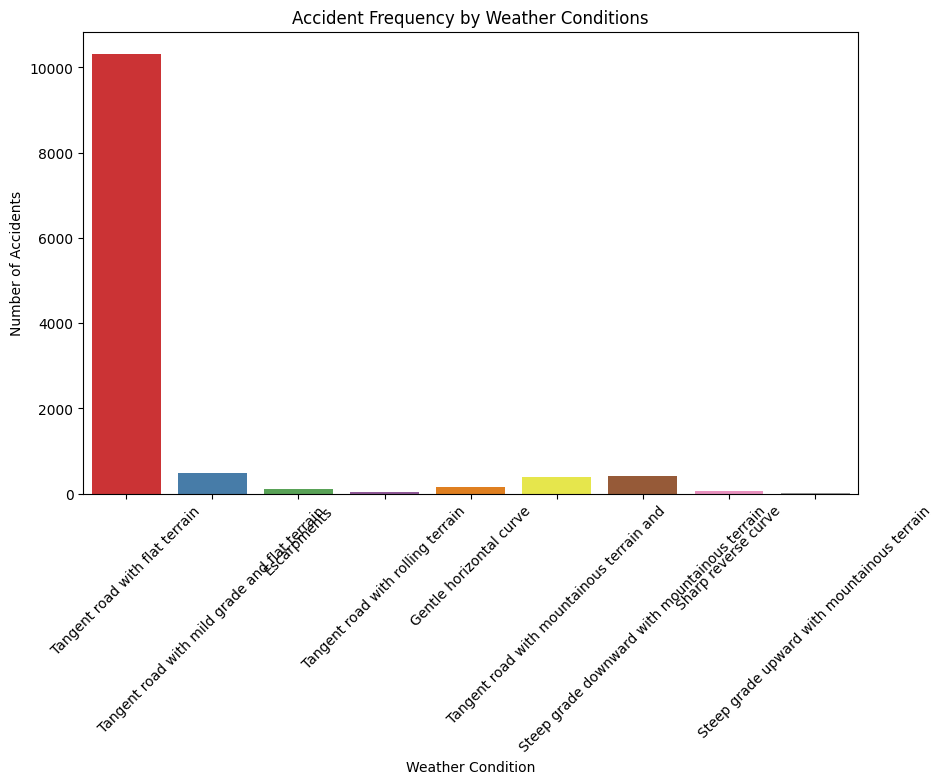

C:\Users\jrahu\AppData\Local\Temp\ipykernel_9348\1063714268.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Road_surface_type', data=data, palette='Set3')


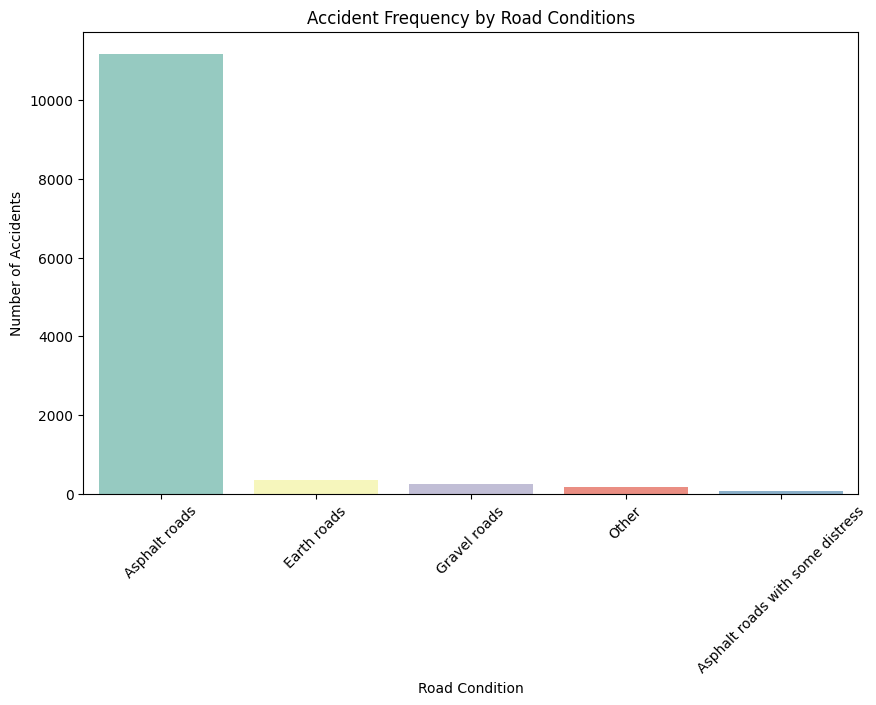

Analysis complete.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset (Ensure the path is correct)
data = pd.read_csv(r"C:\Users\jrahu\Desktop\jupyter projects\archive (1)\RTA Dataset.csv")

# Display the column names and first few rows to understand the dataset structure
print("Columns in dataset:", data.columns)
print(data.head())

# Data Cleaning and Preprocessing

# Convert 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Extract hour and create time period categories
data['Hour'] = data['Time'].dt.hour

def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Period'] = data['Hour'].apply(categorize_time)

# Drop rows where essential columns are missing
data = data.dropna(subset=['Road_allignment', 'Road_surface_type'])

# Data Analysis and Visualization

# Accident frequency by time period
plt.figure(figsize=(10,6))
sns.countplot(x='Period', data=data, palette='Set2')
plt.title('Accident Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Accident frequency by weather conditions
plt.figure(figsize=(10,6))
sns.countplot(x='Road_allignment', data=data, palette='Set1')
plt.title('Accident Frequency by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Accident frequency by road conditions
plt.figure(figsize=(10,6))
sns.countplot(x='Road_surface_type', data=data, palette='Set3')
plt.title('Accident Frequency by Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Output a message indicating that the process is complete
print("Analysis complete.")